In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Internships/Cortex N Grey/Cat&Dog/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
# #Validation Set
# test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Internships/Cortex N Grey/Cat&Dog/test1',
#                                            target_size=(64,64),
#                                            batch_size = 32,
#                                            class_mode='binary',
#                                            shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('/content/drive/MyDrive/Internships/Cortex N Grey/Cat&Dog/test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)


Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
    # %%capture
import tensorflow as tf
with tf.device(tf.DeviceSpec(device_type="GPU", device_index='0')):
        classifier.fit_generator(train_set,
                                steps_per_epoch=50, 
                                epochs = 20,
                                validation_data = train_set,
                                validation_steps = 20, 
                                #callbacks=[tensorboard]
                                );

Epoch 1/20


<ipython-input-16-bcd780a421f8>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(train_set,


50/50 [==============================] - 964s 19s/step - loss: 0.6934 - accuracy: 0.5431 - val_loss: 0.6914 - val_accuracy: 0.5203
Epoch 2/20
50/50 [==============================] - 887s 18s/step - loss: 0.6863 - accuracy: 0.5663 - val_loss: 0.6821 - val_accuracy: 0.5906
Epoch 3/20
50/50 [==============================] - 797s 16s/step - loss: 0.6681 - accuracy: 0.6175 - val_loss: 0.6440 - val_accuracy: 0.6438
Epoch 4/20
50/50 [==============================] - 724s 15s/step - loss: 0.6219 - accuracy: 0.6538 - val_loss: 0.6491 - val_accuracy: 0.6438
Epoch 5/20
50/50 [==============================] - 657s 13s/step - loss: 0.6262 - accuracy: 0.6481 - val_loss: 0.6048 - val_accuracy: 0.6766
Epoch 6/20
50/50 [==============================] - 583s 12s/step - loss: 0.5954 - accuracy: 0.6837 - val_loss: 0.5981 - val_accuracy: 0.6641
Epoch 7/20
50/50 [==============================] - 557s 11s/step - loss: 0.5858 - accuracy: 0.6819 - val_loss: 0.5889 - val_accuracy: 0.7266
Epoch 8/20
50/50 

In [ ]:
classifier.save('/content/drive/MyDrive/Internships/Cortex N Grey/dogcat_model_bak.h5')

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('/content/drive/MyDrive/Internships/Cortex N Grey/dogcat_model_bak.h5')

1/1 [==============================] - 0s 137ms/step


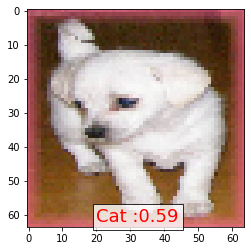

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Internships/Cortex N Grey/Cat&Dog/test1/10035.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()